In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import json
import os
# import random
import csv

import spacy
from gensim import corpora

from collections import Counter
from collections import defaultdict

import pickle

In [130]:
import itertools

In [119]:
sns.set()

Compiling the csvs (no longer need to run):

In [2]:
file_names = [f for f in os.listdir() if f.endswith('.csv')]

In [3]:
combined_df = pd.concat((pd.read_csv(file).sample(frac=0.1) for file in tqdm(file_names, desc='Processing CSV files')), ignore_index=True)
combined_df.to_csv('output_sample.csv', index=False)

Processing CSV files:   0%|                                                                     | 0/34 [00:00<?, ?it/s]C:\Users\ryanc\AppData\Local\Temp\ipykernel_33620\2891609431.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat((pd.read_csv(file).sample(frac=0.1) for file in tqdm(file_names, desc='Processing CSV files')), ignore_index=True)
Processing CSV files:   6%|███▌                                                         | 2/34 [00:11<02:50,  5.33s/it]C:\Users\ryanc\AppData\Local\Temp\ipykernel_33620\2891609431.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat((pd.read_csv(file).sample(frac=0.1) for file in tqdm(file_names, desc='Processing CSV files')), ignore_index=True)
Processing CSV files:  21%|████████████▌                                                | 7/34 [00:23<01:19,  2.94s/it]C:\Users\ryanc\AppData\Lo

Basic overview of data:

In [4]:
combined_df.shape

(1558328, 18)

In [6]:
combined_df.head()

Unnamed: 0               userid       username  \
0      929174  1496456082733948931       Garda21x   
1     1020518            770356860  BrotherLeeLuv   
2      304376  1066039780306087936    DanTheLyons   
3      576447   938307485500428288   isoaho_jussi   
4       96650             88459531         rwbnsa   

                                            acctdesc  \
0  I Stand with The LEGITIMATE President of the U...   
1  InterFaith Minister. Spreading Our Creators LO...   
2  Lyons, D. Washingtonian. Published poet. Self-...   
3  Oulu Plogging perustaja. Rakastan metsiä, järv...   
4  Proud father of two daughters. Army Brat_USMC ...   

                        location  following  followers  totaltweets  \
0                            NaN        119          6           55   
1  The caring part of your Heart       1153        506        49381   
2                            NaN       4760       5304        18459   
3                       Finland         874        990         8866   
4                            NaN       4169        943        18747   

                usercreatedts              tweetid  \
0  2022-02-23 12:06:05.000000  1497541294473711616   
1  2012-08-20 22:41:50.000000  1497619300533821440   
2  2018-11-23 18:44:24.000000  1497003904881496074   
3  2017-12-06 07:21:52.000000  1497238480744861697   
4  2009-11-08 17:05:04.000000  1496824486796083208   

               tweetcreatedts  retweetcount  \
0  2022-02-26 11:57:22.000000           112   
1  2022-02-26 17:07:20.000000           882   
2  2022-02-25 00:21:58.000000             0   
3  2022-02-25 15:54:05.000000            12   
4  2022-02-24 12:29:01.000000            29   

                                                text  \
0  Ukrainians gathering in Warsaw, Poland chantin...   
1  Ukrainian citizens destroy 2 Russian tanks wit...   
2  #WritingCommunity #writing #amwriting #poem #p...   
3  @DaveKeating @dougf24 @whilderbrandt @joekeen9...   
4  A reminder for the Texas Trumpers:\n\n#Ukraine...   

                                            hashtags language coordinates  \
0                                                 []       en         NaN   
1                                                 []       en         NaN   
2  [{'text': 'WritingCommunity', 'indices': [0, 1...       en         NaN   
3                                                 []       en         NaN   
4  [{'text': 'Ukraine', 'indices': [55, 63]}, {'t...       en         NaN   

   favorite_count                 extractedts  
0               0  2022-02-26 11:58:48.688379  
1               0  2022-02-26 17:08:12.235677  
2               0  2022-02-25 00:25:34.437156  
3               0  2022-02-25 15:57:08.989206  
4               0  2022-02-24 12:29:50.538173

In [5]:
combined_df.isna().sum()

Unnamed: 0              0
userid                  0
username                0
acctdesc           339412
location           647193
following               0
followers               0
totaltweets             0
usercreatedts           0
tweetid                 0
tweetcreatedts          0
retweetcount            0
text                    0
hashtags                0
language                0
coordinates       1557692
favorite_count          0
extractedts             0
dtype: int64

It's fine if location is NaN, I won't replace it with another one. I do have coordinates though.

In [8]:
combined_df.nunique()

Unnamed: 0        1186405
userid             720543
username           722794
acctdesc           571325
location           155354
following           26583
followers           54550
totaltweets        249314
usercreatedts      719361
tweetid           1557441
tweetcreatedts     997273
retweetcount        31301
text               732688
hashtags           452782
language               65
coordinates           456
favorite_count        318
extractedts       1557441
dtype: int64

In [10]:
combined_df['location'].value_counts()

location
United States            11608
Ukraine                   8373
India                     7429
France                    6123
London, England           5864
                         ...  
Doha, India, USA             1
Mumbai/Chandigarh            1
Chiusi/Siena/Reggello        1
Тут                          1
Biel, Switzerland            1
Name: count, Length: 155354, dtype: int64

In [11]:
combined_df['language'].value_counts()

language
en     1048587
fr       76985
de       66944
und      64807
it       60925
        ...   
hy           6
sd           5
dv           3
ug           2
lo           1
Name: count, Length: 65, dtype: int64

In [12]:
english_tweets = combined_df[combined_df['language'] == 'en']

In [13]:
english_tweets.shape

(1048587, 18)

In [14]:
english_tweets.to_csv('english_tweets.csv', index=False)

I now have this csv I can use from now on. Just the English tweets.

In [223]:
english_tweets = pd.read_csv('english_tweets.csv')

C:\Users\ryanc\AppData\Local\Temp\ipykernel_12284\2925272866.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  english_tweets = pd.read_csv('english_tweets.csv')


In [4]:
english_tweets.shape

(1048587, 18)

In [5]:
english_tweets.head()

Unnamed: 0               userid       username  \
0      929174  1496456082733948931       Garda21x   
1     1020518            770356860  BrotherLeeLuv   
2      304376  1066039780306087936    DanTheLyons   
3      576447   938307485500428288   isoaho_jussi   
4       96650             88459531         rwbnsa   

                                            acctdesc  \
0  I Stand with The LEGITIMATE President of the U...   
1  InterFaith Minister. Spreading Our Creators LO...   
2  Lyons, D. Washingtonian. Published poet. Self-...   
3  Oulu Plogging perustaja. Rakastan metsiä, järv...   
4  Proud father of two daughters. Army Brat_USMC ...   

                        location  following  followers  totaltweets  \
0                            NaN        119          6           55   
1  The caring part of your Heart       1153        506        49381   
2                            NaN       4760       5304        18459   
3                       Finland         874        990         8866   
4                            NaN       4169        943        18747   

                usercreatedts              tweetid  \
0  2022-02-23 12:06:05.000000  1497541294473711616   
1  2012-08-20 22:41:50.000000  1497619300533821440   
2  2018-11-23 18:44:24.000000  1497003904881496074   
3  2017-12-06 07:21:52.000000  1497238480744861697   
4  2009-11-08 17:05:04.000000  1496824486796083208   

               tweetcreatedts  retweetcount  \
0  2022-02-26 11:57:22.000000           112   
1  2022-02-26 17:07:20.000000           882   
2  2022-02-25 00:21:58.000000             0   
3  2022-02-25 15:54:05.000000            12   
4  2022-02-24 12:29:01.000000            29   

                                                text  \
0  Ukrainians gathering in Warsaw, Poland chantin...   
1  Ukrainian citizens destroy 2 Russian tanks wit...   
2  #WritingCommunity #writing #amwriting #poem #p...   
3  @DaveKeating @dougf24 @whilderbrandt @joekeen9...   
4  A reminder for the Texas Trumpers:\n\n#Ukraine...   

                                            hashtags language coordinates  \
0                                                 []       en         NaN   
1                                                 []       en         NaN   
2  [{'text': 'WritingCommunity', 'indices': [0, 1...       en         NaN   
3                                                 []       en         NaN   
4  [{'text': 'Ukraine', 'indices': [55, 63]}, {'t...       en         NaN   

   favorite_count                 extractedts  
0               0  2022-02-26 11:58:48.688379  
1               0  2022-02-26 17:08:12.235677  
2               0  2022-02-25 00:25:34.437156  
3               0  2022-02-25 15:57:08.989206  
4               0  2022-02-24 12:29:50.538173

In [15]:
english_tweets['location'].value_counts()

location
United States                   10539
Ukraine                          6435
India                            5378
London, England                  5320
London                           4912
                                ...  
Glenrothes, Fife, Scotland.         1
Server, Internet                    1
Arizona Bay                         1
CNY, USA                            1
Des Moines, Iowa                    1
Name: count, Length: 107800, dtype: int64

In [20]:
english_tweets.isna().sum()

Unnamed: 0              0
userid                  0
username                0
acctdesc           227139
location           425827
following               0
followers               0
totaltweets             0
usercreatedts           0
tweetid                 0
tweetcreatedts          0
retweetcount            0
text                    0
hashtags                0
language                0
coordinates       1048221
favorite_count          0
extractedts             0
dtype: int64

In [21]:
# seeing common words and hopefully nouns
word_counts = english_tweets['text'].str.split().explode().value_counts()
print(word_counts.nlargest(10))

text
the         1104238
to           745316
of           743532
in           583685
and          490345
a            405453
#Ukraine     370725
is           363888
for          247653
on           202419
Name: count, dtype: int64


In [23]:
word_counts.iloc[10:50]

text
are                  188210
Russian              183410
with                 172967
#Russia              165197
The                  164008
from                 161956
that                 155741
by                   129771
&amp;                122207
#StandWithUkraine    120403
will                 118689
be                   113283
have                 109031
this                 108392
I                    107746
has                  107512
Ukraine              106419
not                  102388
Ukrainian            102189
you                  101507
was                   92454
-                     90886
as                    90222
war                   88553
it                    87331
at                    83453
people                83156
their                 80191
This                  74124
against               73885
#Putin                73103
we                    72722
Russia                66281
all                   66083
they                  65887
#Ukraine.      

In [24]:
word_counts.iloc[50:100]

text
an                     59582
who                    59375
his                    59204
#UkraineRussiaWar      54181
🇺🇦                     53541
more                   52244
been                   52106
A                      48848
your                   47408
but                    47246
he                     46528
out                    45230
were                   44509
what                   42798
Putin                  42535
world                  42330
can                    41933
its                    41141
one                    40433
In                     39966
no                     39916
my                     39506
support                38868
or                     38556
now                    38461
#Kyiv                  37590
#StopPutin             37051
#UkraineWar            35972
over                   35817
military               35451
do                     34838
Ukraine.               34673
#RussiaUkraineWar      34217
just                   33200
#UkraineU

In [27]:
word_counts.iloc[100:150]

text
They                    28752
help                    28691
#RussianUkrainianWar    28285
how                     28053
forces                  27775
needs                   27755
stop                    27745
It                      27711
weapons                 27530
if                      27295
being                   26679
#Ukrainian              26368
#ukraine                25784
must                    25674
would                   25026
into                    24945
killed                  24674
there                   24667
us                      24467
should                  24265
children                23971
city                    23935
defend                  23860
provide                 23856
when                    23837
only                    23585
want                    23019
need                    22922
civilian                22239
He                      21998
#Anonymous              21951
which                   21839
If                      21647
innoc

In [29]:
word_counts.iloc[150:200]

text
says                   19128
destroyed              18891
country                18878
also                   18774
her                    18755
near                   18631
And                    18594
war.                   18530
many                   18357
Russians               18235
assistance             18094
#Putin.                17984
some                   17778
|                      17678
Kyiv                   17669
soldiers               17575
army                   17509
#SlavaUkraini          17427
where                  17410
take                   17391
because                17173
new                    16817
You                    16817
those                  16800
#StopPutinNOW          16699
#RussiaUkraine         16602
any                    16361
#SafeAirliftUkraine    16150
But                    15916
today                  15807
had                    15764
go                     15719
attack                 15619
down                   15386
during   

In [30]:
word_counts.iloc[200:250]

text
#Russia.                14309
right                   14309
first                   14225
No                      14223
#Ukraine️               14202
nuclear                 14163
fight                   14134
2                       14062
What                    14028
back                    13837
him                     13802
since                   13634
captured                13611
As                      13584
before                  13416
even                    13392
via                     13305
continue                13170
last                    13149
sanctions               13145
could                   13136
while                   13135
#russia                 13109
countries               13032
air                     13028
end                     12965
situation               12943
#PutinIsaWarCriminal    12915
#Kharkiv                12866
another                 12856
million                 12805
already                 12788
it.                     12776
fight

This is nice, but the spaCy module can categorize this better.

In [22]:
# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])
# nlp.add_pipe("tagger")
# nlp.add_pipe("attribute_ruler")

# nlp = spacy.load("en_core_web_sm")
nlp.pipe_names  # Check the existing components

# Modify the pipeline to include the necessary components
# nlp.add_pipe("tagger", before="lemmatizer")
# nlp.add_pipe("morphologizer", before="lemmatizer")

# Create a new document: doc
doc = nlp(english_tweets['text'].iloc[0])

# Print all of the found entities and their labels
# i = 0
# while i > 10:
for ent in doc.ents:
    print(ent.label_, ent.text)
        # i += 1

NORP Ukrainians
GPE Warsaw
GPE Poland
GPE Poland
NORP Ukrainian
GPE Ukraine
GPE Russia


I personally needed to download en_core_web_sm with the following in cmd:

In [251]:
# python -m spacy download en_core_web_sm

Iterate through each row to make a dictionary of counts of entities.

## Scrap Work

In [31]:
# list comprehension

# entity_counts = Counter(ent.text for doc in tqdm(nlp(english_tweets['text']), total=len(english_tweets)) for ent in doc.ents)
# entity_counts = Counter(ent.text for doc in tqdm(english_tweets['text'].apply(nlp), total=len(english_tweets)) for ent in doc.ents)

In [252]:
# map function
# ==========

# entity_counts = {}

# def process_tweet(text):
#     doc = nlp(text)
#     for ent in doc.ents:
#         entity_text = ent.text
#         if entity_text in entity_counts:
#             entity_counts[entity_text] += 1
#         else:
#             entity_counts[entity_text] = 1

# list(tqdm(map(process_tweet, english_tweets['text']), total=len(english_tweets)))

In [253]:
# Probably ineffecient compared to above
# nested loops
# ===========


# entity_counts = {}

# for i in tqdm(range(len(english_tweets))):
#     doc = nlp(english_tweets['text'].iloc[i])
    
#     for ent in doc.ents:
#         entity_text = ent.text
#         if entity_text in entity_counts:
#             entity_counts[entity_text] += 1
#         else:
#             entity_counts[entity_text] = 1

## pretrained NER model for EDA

In [30]:
# defaultdict
# the one I ended up using
# ===========

entity_counts = defaultdict(int)

def process_tweet(text):
    doc = nlp(text)
    for ent in doc.ents:
        entity_counts[ent.text] += 1

list(tqdm(map(process_tweet, english_tweets['text']), total=len(english_tweets)))

100%|█████████████████████████████████████████████████████████████████████| 1048587/1048587 [1:26:38<00:00, 201.70it/s]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [14]:
entity_counts

{'Ukrainians': 105,
 'Warsaw': 5,
 'Poland': 80,
 'Ukrainian': 641,
 'Ukraine': 3281,
 'Russia': 2088,
 '2': 49,
 'Russian': 1163,
 'Gasoline': 9,
 'Kiev': 80,
 'russian': 27,
 '#': 868,
 '#poem #': 1,
 'UkraineCrisis': 13,
 'UkraineRussia': 384,
 'UkraineWar': 64,
 '2022': 16,
 '@DheepthiParis': 1,
 '@bsquinn @Observers': 1,
 '@Ellen_TLG @nseskuria': 1,
 'European': 21,
 'Vladimir': 21,
 'Putin': 752,
 'Brussels': 4,
 'Europe': 67,
 'Moscow': 87,
 'Texas': 3,
 'https://t.co/1AZapVPUOP': 1,
 "next month's": 1,
 'WorldCup': 1,
 'Zelensky': 110,
 'https://t.co/hNiCWp0pXJ': 2,
 '#Ukraine #': 162,
 '#Kiev #RussiaUkraineWar #': 7,
 '@Reddit': 1,
 'worldwar3': 62,
 '#RussiaUkraineConflict https://t.co/uVIG6szpL4': 1,
 'Saudi Arabia': 2,
 '2020': 8,
 '#OOTT #': 3,
 'Ukraine  https://t.co/lLw0C9uSbx': 1,
 'Queens': 1,
 'SlavaUkraini': 7,
 'UkraineWar #': 7,
 'Bulgaria': 4,
 'Bulgarians': 1,
 '#bulgaria': 1,
 'ukraine': 63,
 'KGB': 3,
 'post-Soviet': 3,
 'today': 130,
 'PutinsGOP': 2,
 '#Ukrain

Sorted by highest count (value) desc. Now I can just read the pickle file I made from the named entity recognition.

In [3]:
with open('entity_counts.pkl', 'rb') as file:
    # Load the data from the file
    entity_counts = pickle.load(file)

In [8]:
sort_entity_counts = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)
sort_entity_counts

[('Ukraine', 575810),
 ('Russia', 320001),
 ('#', 229525),
 ('Russian', 219167),
 ('Putin', 158227),
 ('Ukrainian', 105730),
 ('NATO', 47418),
 ('StopPutin', 32200),
 ('today', 31203),
 ('US', 30630),
 ('StopRussia', 30013),
 ('Russians', 28384),
 ('Ukrainians', 28170),
 ('Mariupol', 26335),
 ('Europe', 22125),
 ('EU', 21514),
 ('#Ukraine #', 19936),
 ('Poland', 17832),
 ('#StandWithUkraine', 17624),
 ('Moscow', 17209),
 ('russia', 16139),
 ('China', 15895),
 ('one', 15526),
 ('UK', 15357),
 ('SlavaUkraini', 15097),
 ('UkraineRussia', 14521),
 ('Zelensky', 14504),
 ('first', 14190),
 ('Biden', 14106),
 ('2', 12880),
 ('Today', 12527),
 ('#SafeAirliftUkraine #', 12494),
 ('UkraineWar', 12194),
 ('@NATO', 11042),
 ('Kyiv', 10914),
 ('Tigray', 9963),
 ('Kherson', 9802),
 ('two', 9211),
 ('#UkraineRussiaWar #', 8895),
 ('Syria', 8758),
 ('Germany', 8744),
 ('russian', 8594),
 ('India', 8493),
 ('Kremlin', 8471),
 ('#RussiaUkraineWar #', 8186),
 ('European', 7996),
 ('U.S.', 7881),
 ('#Ukra

Saving entity counts defaultdict as a pickle file.

In [40]:
# with open('entity_counts.pkl', 'wb') as f:
#     pickle.dump(entity_counts, f)

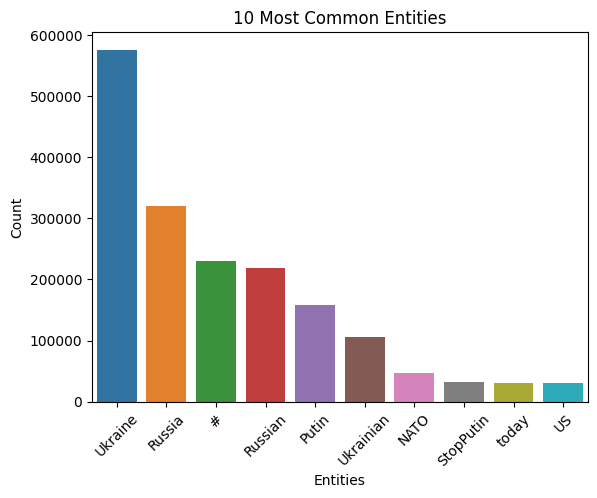

In [13]:
# Get the X most common words from the dictionary

entity_x = 10

# Extract the entity names and counts from the sorted list
entities = [entity for entity, count in sort_entity_counts]
counts = [count for entity, count in sort_entity_counts]

# Create a bar plot with Seaborn
sns.barplot(x=entities[:entity_x], y=counts[:entity_x])

# Set labels and title
plt.xlabel('Entities')
plt.ylabel('Count')
plt.title(f'{len(entity_x)} Most Common Entities')
plt.xticks(rotation=45)

# Show the plot
plt.show()

I should get rid of '#'. I should also start thinking about grouping similar enough entities like Ukraine and Ukrainian.

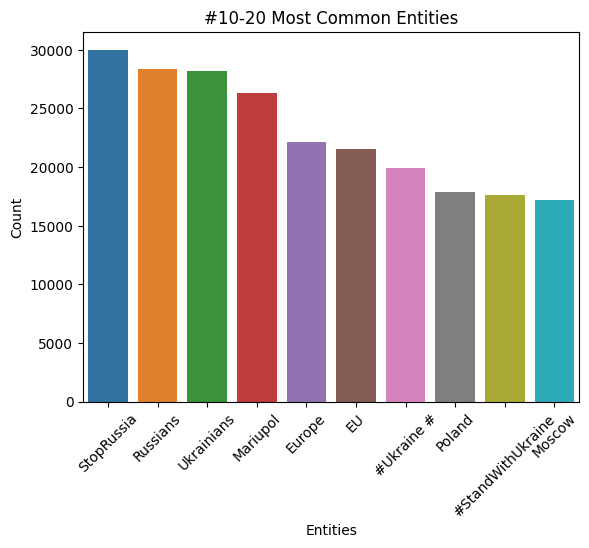

In [19]:
# looking down the sorted list
adjust_entities = 10

# barplot
sns.barplot(x=entities[adjust_entities:entity_x+adjust_entities], y=counts[adjust_entities:entity_x+adjust_entities])

# labels and title
plt.xlabel('Entities')
plt.ylabel('Count')
plt.title(f'#{adjust_entities}-{entity_x+adjust_entities} Most Common Entities')
plt.xticks(rotation=45)

plt.show()

These hashtags need to be circumvented for situations like these... but not all of them

Histogram:

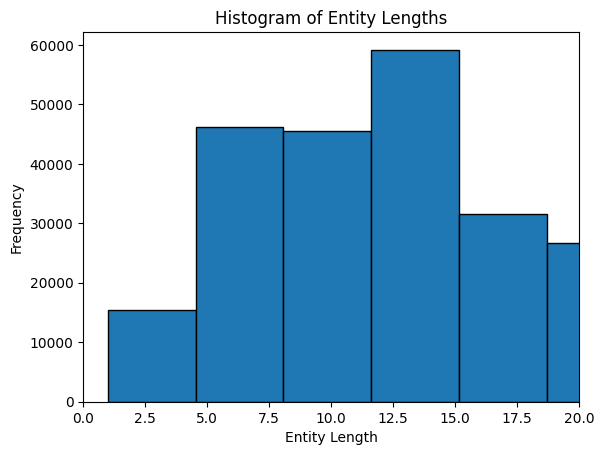

In [26]:
# Calculate entity lengths
entity_lengths = [len(entity) for entity, count in sort_entity_counts]

# Create histogram
plt.hist(entity_lengths, bins=80, edgecolor='black')

# Set labels and title
plt.xlabel('Entity Length')
plt.ylabel('Frequency')
plt.title('Histogram of Entity Lengths')
plt.xlim(0, 20)

# Show plot
plt.show()

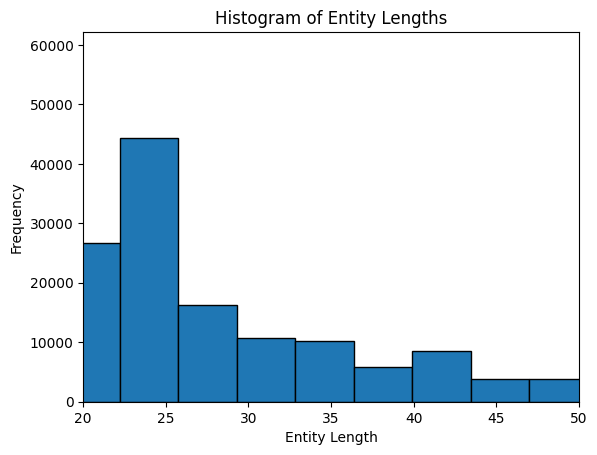

In [28]:
# Create histogram
plt.hist(entity_lengths, bins=80, edgecolor='black')

# Set labels and title
plt.xlabel('Entity Length')
plt.ylabel('Frequency')
plt.title('Histogram of Entity Lengths')
plt.xlim(20, 50)

# Show plot
plt.show()

I have hidden the work below because my reasoning was flawed. I made a dataframe based on entities and count without keeping track of labels. And then I used a pretrained NER model on those individual entities. I believe this was a bad idea because by themselves, the entities lose context for the labels.

Either way, this EDA is flawed, because this English model seems to work poorly with tweets based on various poorly labeled entities. But, this helps me somewhat understand the data better.

Warning: one of the print statements below in the scrapped code updated, printing thousands of entities.

## Scrapped NER label and count data wrangling method

I will have to break up this entity string into chunks because of memory allocation issues. 

In [55]:
# nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

# entity_string = ' '.join([entity[0] for entity in sort_entity_counts])

# # Create another document: doc2
# doc2 = nlp(entity_string[:2000])

# # span indices are 143k

# # Print some of the found entities and their labels
# # i = 0
# # while i > 10:
# for i in range(200):  # Print the first 200 entities
#     ent = doc2.ents[i]
#     print(ent[0], ent[1])

Now I will use an English spacy language model to view entity types.

In [54]:
# instead of trying to have for loops with indices issues, i will try chunking

chunk_size = 500
chunks = [entity_string[i:i+chunk_size] for i in range(0, len(entity_string), chunk_size)]

docs = nlp.pipe(chunks)

for doc in docs:
    for ent in doc.ents:
        print(ent.text, ent.label_)

Ukraine GPE
Russia GPE
Russian NORP
Putin Ukrainian PERSON
NATO ORG
StopPutin ORG
US GPE
StopRussia ORG
Russians NORP
Ukrainians NORP
Mariupol Europe EU ORG
Ukraine GPE
Poland GPE
Moscow GPE
russia GPE
China GPE
UK GPE
SlavaUkraini ORG
UkraineRussia Zelensky PERSON
Biden 2 PERSON
#SafeAirliftUkraine # MONEY
Tigray Kherson PERSON
two CARDINAL
#UkraineRussiaWar # MONEY
Syria GPE
Germany GPE
India Kremlin ORG
#RussiaUkraineWar # MONEY
European NORP
Belarus GPE
West Polish NORP
Trump ORG
UkraineUnderAttaсk GPE
#ukraine # One MONEY
American NORP
UN ORG
Israel GPE
tonight TIME
OpRussia GPE
#StandWithUkraine # MONEY
yesterday DATE
America German NORP
100% PERCENT
putin Belarusian PERSON
#RussianUkrainianWar # #RussiaUkraineWar MONEY
Afghanistan GPE
Vladimir Putin Kiev PERSON
thousands CARDINAL
Turkey GPE
5 CARDINAL
4 CARDINAL
Nazis PERSON
2014 DATE
Yemen GPE
March 2022 DATE
FreeUkraine ORG
🇮 MONEY
British NORP
Ethiopia GPE
Ukriane NORP
Chinese NORP
second ORDINAL
Iran GPE
IStandWithPutin ORG


In [69]:
chunk_size = 500
chunks = [entity_string[i:i+chunk_size] for i in range(0, len(entity_string), chunk_size)]

I only reran the below because it got messed up in some previous code.

In [227]:
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

In [78]:
docs = nlp.pipe(chunks)

In [79]:
# Create a list to store the entity recognition results
ner_results = []

# Loop through the documents and entities
for doc in tqdm(docs, desc="Processing documents"):
    for ent in doc.ents:
        # Append the entity text and label to the results list
        ner_results.append((ent.text, ent.label_))

# Create a Pandas DataFrame from the results list
NER = pd.DataFrame(ner_results, columns=['Entity', 'Label'])

Processing documents: 13191it [00:59, 221.46it/s]


In [121]:
chunk_size = 500
chunks2 = [list(entity_counts.keys())[i:i+chunk_size] for i in range(0, len(entity_counts), chunk_size)]

In [123]:
entity_counts_df = pd.DataFrame(list(entity_counts.items()), columns=['Entity', 'Count'])

In [199]:
entity_labels = defaultdict()

for i, text in enumerate(entity_counts_df['Entity']):
    if i % (len(entity_counts_df) // 100) == 0:
        print(f"Processing {i+1}/{len(entity_counts_df)} entities ({(i+1)/len(entity_counts_df)*100:.2f}% done)")
    doc = nlp(text)
    for ent in doc.ents:
        entity_labels.setdefault(ent.text, ent.label_)

Processing 1/335707 entities (0.00% done)
Processing 3358/335707 entities (1.00% done)
Processing 6715/335707 entities (2.00% done)
Processing 10072/335707 entities (3.00% done)
Processing 13429/335707 entities (4.00% done)
Processing 16786/335707 entities (5.00% done)
Processing 20143/335707 entities (6.00% done)
Processing 23500/335707 entities (7.00% done)
Processing 26857/335707 entities (8.00% done)
Processing 30214/335707 entities (9.00% done)
Processing 33571/335707 entities (10.00% done)
Processing 36928/335707 entities (11.00% done)
Processing 40285/335707 entities (12.00% done)
Processing 43642/335707 entities (13.00% done)
Processing 46999/335707 entities (14.00% done)
Processing 50356/335707 entities (15.00% done)
Processing 53713/335707 entities (16.00% done)
Processing 57070/335707 entities (17.00% done)
Processing 60427/335707 entities (18.00% done)
Processing 63784/335707 entities (19.00% done)
Processing 67141/335707 entities (20.00% done)
Processing 70498/335707 entit

In [204]:
ner_results2 = []

# Loop through the entity_labels defaultdict
for entity, label in tqdm(entity_labels.items(), desc="Processing entities"):
    # Append the entity text and label to the results list
    ner_results2.append((entity, label))

# Create a Pandas DataFrame from the results list
NER = pd.DataFrame(ner_results2, columns=['Entity', 'Label'])




Processing entities:   0%|                                                                  | 0/239837 [00:00<?, ?it/s]


Processing entities:  13%|██████▍                                           | 31058/239837 [00:00<00:00, 309540.45it/s]


Processing entities:  42%|████████████████████▍                            | 100040/239837 [00:00<00:00, 531771.31it/s]


Processing entities: 100%|█████████████████████████████████████████████████| 239837/239837 [00:00<00:00, 759231.08it/s]


In [212]:
len(entity_labels)
print(entity_counts_df.shape)

(335707, 2)


In [202]:
with open('entity_labels.pkl', 'wb') as f:
    pickle.dump(entity_labels, f)

<Axes: xlabel='Label'>

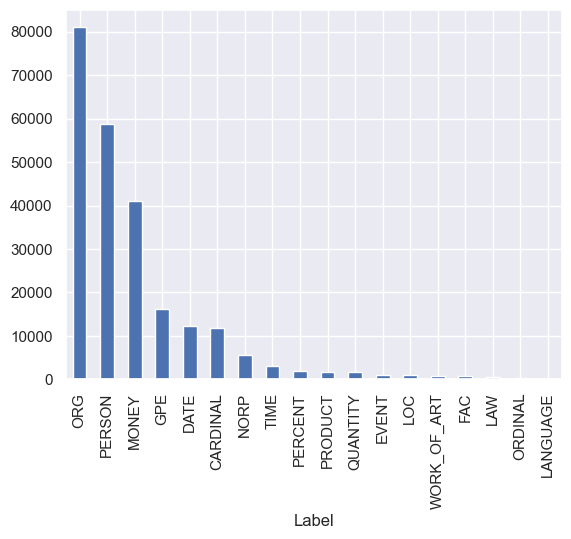

In [205]:
NER['Label'].value_counts().plot(kind='bar')

Zooming in

<Axes: xlabel='Label'>

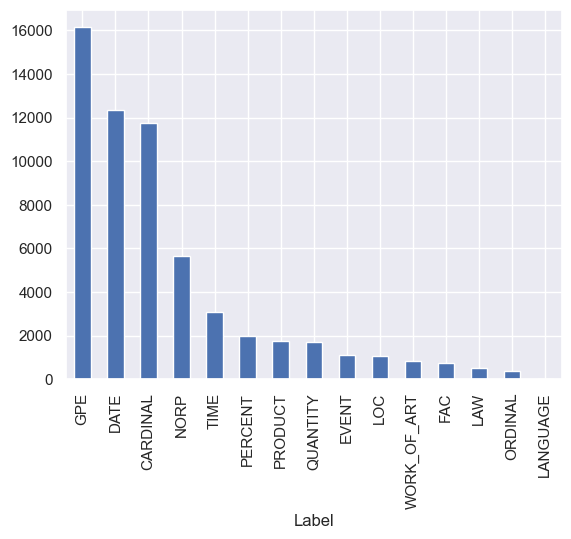

In [206]:
NER['Label'].value_counts().iloc[3:].plot(kind='bar')

<Axes: xlabel='Label'>

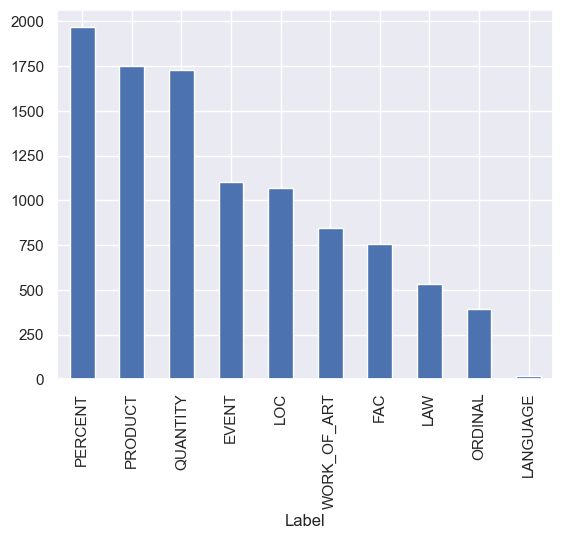

In [207]:
NER['Label'].value_counts().iloc[8:].plot(kind='bar')

Time to add the count to the NER dataframe.

In [215]:
NER_V2 = NER.merge(entity_counts_df, on='Entity', how='right')

In [210]:
print(NER.shape)
print(entity_counts_df.shape)

(239837, 2)
(335707, 2)


In [216]:
NER_V2

Entity   Label   Count
0                                      Ukrainians    NORP   28170
1                                          Warsaw     GPE    3003
2                                          Poland     GPE   17832
3                                       Ukrainian     GPE  105730
4                                         Ukraine     GPE  575810
...                                           ...     ...     ...
335702                                   #astro #     NaN       1
335703                                 #Creator #     NaN       1
335704  DigitalResistance https://t.co/WNcw8TEm80     ORG       1
335705                                        cor     ORG       1
335706                                Joe Glenton  PERSON       1

[335707 rows x 3 columns]

In [217]:
NER_V2.to_csv('NER_V2.csv', index=False)

In [218]:
NER_V2.isna().sum()

Entity         0
Label     114006
Count          0
dtype: int64

In [219]:
NER_V2[NER_V2['Label'].isna()]

Entity Label  Count
8                               Gasoline   NaN    138
17                        @DheepthiParis   NaN     13
34                               @Reddit   NaN      1
40      Ukraine  https://t.co/lLw0C9uSbx   NaN      2
41                                Queens   NaN     15
...                                  ...   ...    ...
335691                  #UkraineWar #Art   NaN      1
335693            “Komsomolksaya Pravda”   NaN      1
335700                        Great city   NaN      1
335702                          #astro #   NaN      1
335703                        #Creator #   NaN      1

[114006 rows x 3 columns]

In [221]:
NER_V2_count_sorted = NER_V2.sort_values(by='Count', ascending=False)
NER_V2_count_sorted.iloc[50:100]

Entity     Label  Count
47                           ukraine       GPE   7081
129                          Belarus       GPE   7009
271                             West       LOC   7001
212                           Polish      NORP   6855
245                            Trump       ORG   6583
34065             UkraineUnderAttaсk    PERSON   6562
426                       #ukraine #     MONEY   6483
358                              One  CARDINAL   6434
825                         American      NORP   6404
174                               UN       ORG   6111
477                    RussiaUkraine       ORG   6057
1000                          Israel       GPE   6048
642                          tonight      TIME   5978
260                         OpRussia       ORG   5955
325                              USA       GPE   5790
598                          UKRAINE       GPE   5713
1567                               💛       GPE   5650
210                           Indian      NORP   5531
59032  #StandWithUkraine #StopTheWar     MONEY   5503
1210                       yesterday      DATE   5477
337                          America       GPE   5285
688                           German      NORP   5278
59                      @ZelenskyyUa       ORG   5183
324                             100%   PERCENT   5149
11118                          Irpin       GPE   5131
198                            putin    PERSON   5120
257                       Belarusian      NORP   5031
561           #RussianUkrainianWar #     MONEY   4982
60                 #RussiaUkraineWar     MONEY   4941
1241                  TigrayGenocide       ORG   4916
1333                               🙏       GPE   4847
314                      Afghanistan       GPE   4674
810                           Odessa    PERSON   4671
72295           #StandWithUkraine️ #     MONEY   4660
201                             Lviv       GPE   4574
1771                       Chernihiv      NORP   4557
259                   Vladimir Putin    PERSON   4556
9                               Kiev       GPE   4495
313                             Iraq       GPE   4366
2201                     PutinHitler       ORG   4317
272                        thousands  CARDINAL   4293
937                           Turkey       GPE   4278
16                              2022      DATE   4216
1273                            Sumy    PERSON   4210
395                             Nazi      NORP   4147
293                 RussiaUkraineWar     MONEY   4109
833                                5  CARDINAL   4095
93                                UA       ORG   4036
86                         Anonymous    PERSON   4033
771                                4  CARDINAL   3986

Clearly, Trump shouldn't be labeled	ORG

And UkraineUnderAttaсk shouldn't be labeled PERSON

Some of these are also redundant like variations of Ukraine and Russia used in hashtags.

Or 5 and 4.

In [ ]:
NER_V2_count_sorted[.iloc[50:100]

In [ ]:
# Create a better NER by turning entity_labels into a dataframe and then joining it with the entity_counts dataframe

# Save dataframe as a csv

# Redo value counts bar graphs above

# entity_labels

In [203]:
# Scrap:

# docs2 = [ent.text, ent.label_ for doc in tqdm(nlp.pipe(entity_counts_df['Entity']), total=len(entity_counts_df)) for ent in doc.ents]

# for text in entity_counts_df['Entity']:
#     doc = nlp(text)
#     for ent in doc.ents:
#         entity_labels.setdefault(ent.text, ent.label_)

# entity_labels = defaultdict()
# pbar = tqdm(entity_counts_df['Entity'], desc="Processing entities")

# for text in pbar:
#     doc = nlp(text)
#     for ent in doc.ents:
#         entity_labels.setdefault(ent.text, ent.label_)

# entities = entity_counts_df['Entity']
# docs2 = [nlp(i) for i in tqdm(entities.iloc[i])]
# docs2 = tqdm(map(nlp, entity_counts_df['Entity']))

# entity_labels = defaultdict()

# def label_entity(text):
#     doc = nlp(text)
#     for ent in doc.ents:
#         entity_labels.setdefault(ent.text, ent.label_)

# tqdm(list(map(label_entity, entity_counts_df['Entity'])), total=len(entity_counts_df))


# text = "Apple is a technology company."
# doc = [nlp(i) for i in text.split()]

# for i in doc:
#     for ent in i.ents:
#         print(ent.text, ent.label_)

In [229]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'matcher'])

In [ ]:
# Failed attempt with dataframe, the data structure is probably too 

# entity_counts_labels = pd.DataFrame(columns=['Entity', 'Count', 'Label'])

# def process_tweet2(text):
#     doc = nlp(text)
#     for ent in doc.ents:
#         entity = ent.text
#         label = ent.label_
#         if entity not in entity_counts_labels['Entity'].values:
#             entity_counts_labels.loc[len(entity_counts_labels)] = [entity, 1, label]
#         else:
#             entity_counts_labels.loc[entity_counts_labels['Entity'] == entity, 'Count'] += 1

# # list(tqdm(map(process_tweet2, english_tweets['text']), total=len(english_tweets)))
# list(tqdm(map(process_tweet2, english_tweets['text']), total=len(english_tweets), miniters=len(english_tweets)//1000))

## Final data wrangling with new NER label and count method

In [232]:
entity_counts_labels = {}

def process_tweet2(text):
    doc = nlp(text)
    for ent in doc.ents:
        entity = ent.text
        label = ent.label_
        key = (entity, label)
        if key in entity_counts_labels:
            entity_counts_labels[key][1] += 1
        else:
            entity_counts_labels[key] = [entity, 1, label]

list(tqdm(map(process_tweet2, english_tweets['text']), total=len(english_tweets), miniters=len(english_tweets)//1000))




  0%|                                                                                      | 0/1048587 [00:00<?, ?it/s]


  0%|                                                                        | 1048/1048587 [00:06<1:49:00, 160.15it/s]


  0%|▏                                                                       | 2096/1048587 [00:12<1:47:34, 162.14it/s]


  0%|▏                                                                       | 3144/1048587 [00:19<1:46:55, 162.96it/s]


  0%|▎                                                                       | 4192/1048587 [00:25<1:47:15, 162.28it/s]


  0%|▎                                                                       | 5240/1048587 [00:32<1:47:09, 162.27it/s]


  1%|▍                                                                       | 6288/1048587 [00:38<1:47:16, 161.95it/s]


  1%|▌                                                                       | 7336/1048587 [00:45<1:48:21, 160.17it/s]


  1%|▌               

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [235]:
with open('entity_counts_labels.pkl', 'wb') as file:
    pickle.dump(entity_counts_labels, file)

entity_counts_labels is a dictionary with a tuple (entity, label) as a key, and count as a value

In [236]:
entity_counts_labels_df = pd.DataFrame([(k[0], k[1], v[1]) for k, v in tqdm(entity_counts_labels.items(), total=len(entity_counts_labels))], 
                  columns=['Entity', 'Label', 'Count'])




  0%|                                                                                       | 0/353192 [00:00<?, ?it/s]


 11%|███████▌                                                               | 37665/353192 [00:00<00:00, 373812.65it/s]


 21%|███████████████                                                        | 75047/353192 [00:00<00:00, 315170.49it/s]


 30%|█████████████████████▏                                                | 107132/353192 [00:00<00:00, 308865.93it/s]


 46%|████████████████████████████████▌                                     | 163994/353192 [00:00<00:00, 402879.68it/s]


 64%|█████████████████████████████████████████████                         | 227596/353192 [00:00<00:00, 481770.85it/s]


100%|██████████████████████████████████████████████████████████████████████| 353192/353192 [00:00<00:00, 485930.35it/s]


In [237]:
entity_counts_labels_df.head()

Entity Label   Count
0  Ukrainians  NORP   28170
1      Warsaw   GPE    2991
2      Poland   GPE   17804
3   Ukrainian  NORP   84908
4     Ukraine   GPE  573042

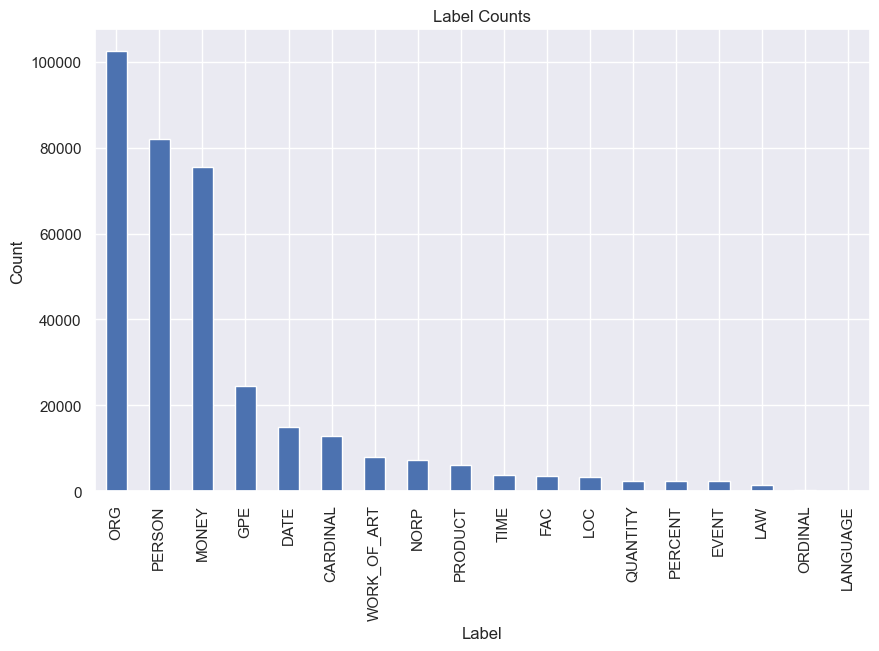

In [238]:
# Count the occurrences of each label
label_counts = entity_counts_labels_df['Label'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

<Axes: xlabel='Label'>

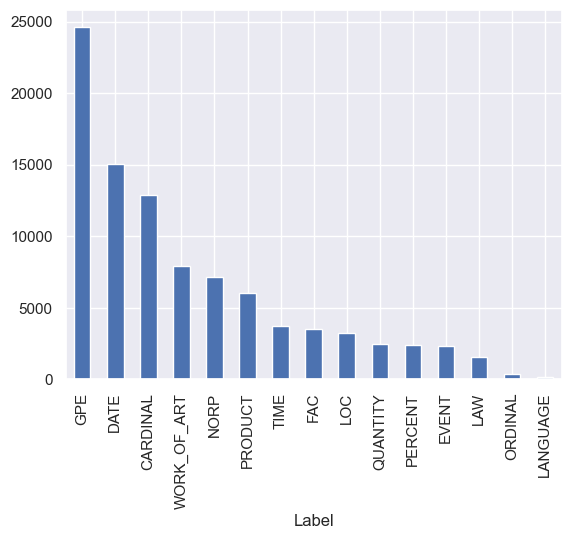

In [241]:
label_counts[3:].plot(kind='bar')

<Axes: xlabel='Label'>

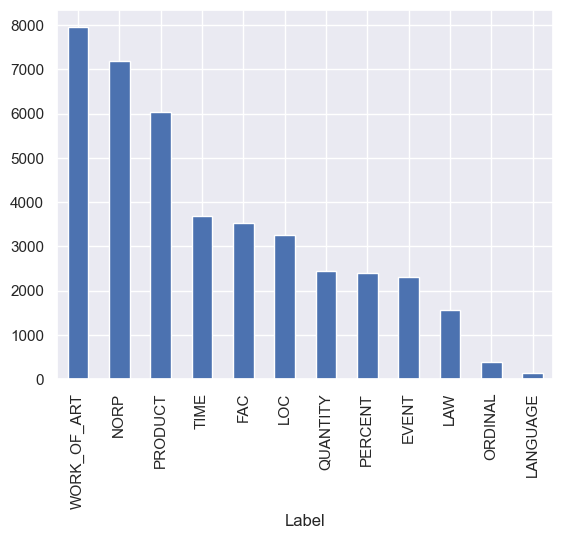

In [243]:
label_counts[6:].plot(kind='bar')

In [244]:
count_ECL = entity_counts_labels_df.sort_values('Count', ascending=False)

In [249]:
count_ECL.head()

Entity     Label   Count
4   Ukraine       GPE  573042
5    Russia       GPE  319998
11        #  CARDINAL  229187
7   Russian      NORP  216006
22    Putin    PERSON  149229

In [250]:
count_ECL[count_ECL.Label == 'ORG']

Entity Label  Count
123                                              NATO   ORG  47405
670                                         StopPutin   ORG  29507
159                                                EU   ORG  20077
298                                        StopRussia   ORG  19956
949                                             @NATO   ORG  10897
...                                               ...   ...    ...
156009                                           CMIE   ORG      1
156020                        https://t.co/L7AhUIu8iE   ORG      1
156024                                       DemVoice   ORG      1
156027  Operation 'Ukrainian Shiba Stealth Retrieval'   ORG      1
156028                                      Kimi &amp   ORG      1

[102376 rows x 3 columns]